## Crash Analysis - Bicyclist Related 
1. Count/Severity Vs. Bikers Age
2. Count/Severity Vs. Bikers Sex
3. Count/Severity Vs. Bicyclist Intoxication


In [1]:
# Dependencies and Setup
#%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


In [2]:
# Read the csv file containing the Bicycle Crash data for North Carolina
input_file_path = "Resources/bicycle-crash-data-chapel-hill-region.csv"
crash_data = pd.read_csv(input_file_path, delimiter = ";")

# View the csv file containing the Bicycle Crash data for North Carolina
crash_data

# There are 11266 records in 55 columns

,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,...,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone
0,"33.9437020597,-78.3493385901",Yes,70,70+,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Rural,40 - 45 MPH,No Control Present,Clear,No
1,"35.3217726,-79.0388423701",Yes,8,6-10,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,Dry,"Two-Way, Not Divided",None,T-Intersection,Smooth Asphalt,Rural,50 - 55 MPH,Stop Sign,Clear,No
2,"35.77105009,-78.6073184803",Yes,13,11-15,No,No,Facing Traffic,A: Suspected Serious Injury,Travel Lane,Black,...,Dry,"Two-Way, Divided, Positive Median Barrier",None,No Special Feature,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Cloudy,No
3,"35.9394515202,-77.7953706304",Yes,52,50-59,No,No,Facing Traffic,C: Possible Injury,Travel Lane,Black,...,Dry,"One-Way, Not Divided",None,Four-Way Intersection,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No
4,"36.0927628197,-80.2653764398",Yes,27,25-29,No,No,Not Applicable,C: Possible Injury,Non-Roadway,White,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11261,"34.2546581498,-77.9197554903",Yes,26,25-29,No,No,Facing Traffic,C: Possible Injury,Travel Lane,White,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No
11262,"35.2123611203,-80.7913412696",Yes,20,20-24,No,No,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,Black,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,No Control Present,Cloudy,No
11263,"35.64331907,-80.4828223001",Yes,11,11-15,No,No,Facing Traffic,C: Possible Injury,Travel Lane,Unknown/Missing,...,Dry,"Two-Way, Divided, Unprotected Median",None,No Special Feature,Smooth Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No
11264,"34.1935523204,-77.9356315301",No,60,60-69,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No


In [4]:
# Clear rows with missing data in any column
clean_crash_data = crash_data.dropna(how='any')
clean_crash_data

# None of the records were deleted so none of the rows have missing data

,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,...,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone
0,"33.9437020597,-78.3493385901",Yes,70,70+,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Rural,40 - 45 MPH,No Control Present,Clear,No
1,"35.3217726,-79.0388423701",Yes,8,6-10,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,Dry,"Two-Way, Not Divided",None,T-Intersection,Smooth Asphalt,Rural,50 - 55 MPH,Stop Sign,Clear,No
2,"35.77105009,-78.6073184803",Yes,13,11-15,No,No,Facing Traffic,A: Suspected Serious Injury,Travel Lane,Black,...,Dry,"Two-Way, Divided, Positive Median Barrier",None,No Special Feature,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Cloudy,No
3,"35.9394515202,-77.7953706304",Yes,52,50-59,No,No,Facing Traffic,C: Possible Injury,Travel Lane,Black,...,Dry,"One-Way, Not Divided",None,Four-Way Intersection,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No
4,"36.0927628197,-80.2653764398",Yes,27,25-29,No,No,Not Applicable,C: Possible Injury,Non-Roadway,White,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11261,"34.2546581498,-77.9197554903",Yes,26,25-29,No,No,Facing Traffic,C: Possible Injury,Travel Lane,White,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No
11262,"35.2123611203,-80.7913412696",Yes,20,20-24,No,No,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,Black,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,No Control Present,Cloudy,No
11263,"35.64331907,-80.4828223001",Yes,11,11-15,No,No,Facing Traffic,C: Possible Injury,Travel Lane,Unknown/Missing,...,Dry,"Two-Way, Divided, Unprotected Median",None,No Special Feature,Smooth Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No
11264,"34.1935523204,-77.9356315301",No,60,60-69,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No


In [5]:
# Added 2 columns for latitude and longitude by splitting the "geo_point_2d" column for use in mapping
# Adding two new columns to the existing dataframe. 
# bydefault splitting is done on the basis of single space. 
crash_data[["Latitude","Longitude"]] = crash_data["geo_point_2d"].str.split(',',expand=True) 
crash_data

,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,...,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,Latitude,Longitude
0,"33.9437020597,-78.3493385901",Yes,70,70+,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,None,No Special Feature,Coarse Asphalt,Rural,40 - 45 MPH,No Control Present,Clear,No,33.9437020597,-78.3493385901
1,"35.3217726,-79.0388423701",Yes,8,6-10,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,None,T-Intersection,Smooth Asphalt,Rural,50 - 55 MPH,Stop Sign,Clear,No,35.3217726,-79.0388423701
2,"35.77105009,-78.6073184803",Yes,13,11-15,No,No,Facing Traffic,A: Suspected Serious Injury,Travel Lane,Black,...,None,No Special Feature,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Cloudy,No,35.77105009,-78.6073184803
3,"35.9394515202,-77.7953706304",Yes,52,50-59,No,No,Facing Traffic,C: Possible Injury,Travel Lane,Black,...,None,Four-Way Intersection,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,35.9394515202,-77.7953706304
4,"36.0927628197,-80.2653764398",Yes,27,25-29,No,No,Not Applicable,C: Possible Injury,Non-Roadway,White,...,None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No,36.0927628197,-80.2653764398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11261,"34.2546581498,-77.9197554903",Yes,26,25-29,No,No,Facing Traffic,C: Possible Injury,Travel Lane,White,...,None,No Special Feature,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,34.2546581498,-77.9197554903
11262,"35.2123611203,-80.7913412696",Yes,20,20-24,No,No,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,Black,...,None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,No Control Present,Cloudy,No,35.2123611203,-80.7913412696
11263,"35.64331907,-80.4828223001",Yes,11,11-15,No,No,Facing Traffic,C: Possible Injury,Travel Lane,Unknown/Missing,...,None,No Special Feature,Smooth Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No,35.64331907,-80.4828223001
11264,"34.1935523204,-77.9356315301",No,60,60-69,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,None,No Special Feature,Coarse Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No,34.1935523204,-77.9356315301


# # Reviewing Columns of Interest

In [16]:
# Number of cities included in the study
county_count = crash_data["County"].nunique()
city_count = crash_data["City"].nunique()
print (f"Number of Counties included in the study: {county_count}")
print (f"Number of Cities included in the study: {city_count}")

Number of Counties included in the study: 100
Number of Cities included in the study: 327


In [11]:
# Crash count grouped by Crash year
crashes_by_year = crash_data.groupby(["CrashYear"])["geo_point_2d"].count()
crashes_by_year

CrashYear
2007    1001
2008    1018
2009     811
2010     967
2011     899
2012    1020
2013     897
2014     850
2015     949
2016     955
2017    1000
2018     899
Name: geo_point_2d, dtype: int64

In [8]:
# Crash count grouped by Crash Month
crashes_by_month = crash_data.groupby(["CrashMonth"])["geo_point_2d"].count()
crashes_by_month.sort_values(ascending=False)

CrashMonth
September    1248
August       1239
July         1204
June         1154
October      1125
May          1123
April         975
November      837
March         742
December      590
January       516
February      513
Name: geo_point_2d, dtype: int64

In [10]:
# Crash count grouped by Bikers Race
crashes_by_bikers_race = crash_data.groupby(["BikeRace"])["geo_point_2d"].count()
crashes_by_bikers_race.sort_values(ascending=False)

BikeRace
White              6178
Black              3847
Hispanic            603
Unknown/Missing     265
Other               133
Native American     130
Asian               110
Name: geo_point_2d, dtype: int64

In [18]:
# Crash count grouped by County
crashes_by_county = crash_data.groupby(["County"])["geo_point_2d"].count()
crashes_by_county.sort_values(ascending=False).head()

County
Wake           1500
Mecklenburg    1421
New Hanover     767
Guilford        741
Durham          539
Name: geo_point_2d, dtype: int64

In [19]:
# Crash count grouped by City
crashes_by_city = crash_data.groupby(["City"])["geo_point_2d"].count()
crashes_by_city.sort_values(ascending=False).head(10)

City
None - Rural Crash    2404
Charlotte             1284
Raleigh               1025
Wilmington             578
Durham                 500
Greensboro             473
Fayetteville           318
Asheville              237
Winston-Salem          199
Cary                   194
Name: geo_point_2d, dtype: int64

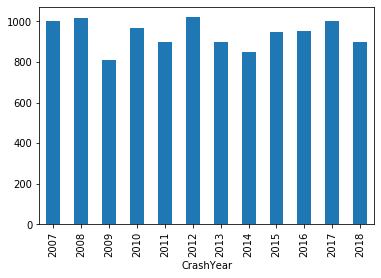

In [26]:
# Create a bar plot for crashes over time

# Generate the bar plot for crashes over time
crashes_by_year.plot(kind='bar')

# Define plot options
# plt.title("Bicycle Crashes in North Carolina")
# plt.xlabel("Year")
# plt.ylabel("Number of Bicycle Crashes in North Carolina")

# Save the bar plot for crashes over time
plt.savefig("Output/CrashesOverTime.png")

# Display the bar plot for crashes over time
plt.show()

In [48]:
# Sort by County, City
sorted_by_city = crash_data.groupby(["County", "City"])["geo_point_2d"].count()
sorted_by_city

County    City        
Alamance  Alamance         1
          Burlington      79
          Elon             6
          Elon College     6
          Gibsonville      2
Name: geo_point_2d, dtype: int64

# # Bicyclist Age Analysis

In [29]:
# Identify the count of unique age group values
agegroup_unique_values = crash_data["BikeAgeGrp"].unique()
agegroup_unique_values

array(['70+', '6-10', '11-15', '50-59', '25-29', 'Unknown', '60-69',
       '30-39', '40-49', '20-24', '0-5', '16-19'], dtype=object)

In [24]:
# Identify all the values for age
age_unique_values = crash_data["BikeAge"].unique()
age_unique_values

array(['70', '8', '13', '52', '27', '999', '69', '57', '39', '33', '14',
       '45', '24', '38', '28', '30', '22', '46', '56', '48', '1', '65',
       '51', '61', '47', '72', '16', '64', '19', '35', '58', '31', '12',
       '53', '23', '49', '36', '60', '20', '34', '44', '37', '18', '9',
       '6', '26', '11', '7', '4', '17', '50', '41', '10', '42', '40', '5',
       '25', '70+', '15', '21', '29', '54', '43', '55', '66', '79', '63',
       '81', '68', '73', '82', '62', '75', '59', '3', '76', '32', '77',
       '67', '71', '80', '74', '87', '89', '93', '0', '84', '78', '91',
       '2', '83', '88', '90'], dtype=object)

In [27]:
# Fine number of crashes by age group
crashes_by_age = crash_data.groupby(["BikeAgeGrp"])["geo_point_2d"].count()
crashes_by_age.sort_values(ascending=False)

BikeAgeGrp
50-59      1599
40-49      1588
20-24      1392
30-39      1327
11-15      1320
16-19      1161
25-29       955
6-10        736
60-69       697
Unknown     196
70+         185
0-5         110
Name: geo_point_2d, dtype: int64

In [140]:
# Crashes by Sex and Race
crashes_by_gender = crash_data.groupby(["BikeSex"])["geo_point_2d"].count()
crashes_by_gender

BikeSex
Female     1669
Male       9391
Unknown     206
Name: geo_point_2d, dtype: int64

In [36]:
# Crashes where bikers were intoxicated
crashes_by_biker_intox = crash_data.groupby(["Biker Intox."])["geo_point_2d"].count()
crashes_by_biker_intox

Biker Intox.
No     10470
Yes      796
Name: geo_point_2d, dtype: int64

In [37]:
# Crashes by Locality
crashes_by_locality = crash_data.groupby(["Locality"])["geo_point_2d"].count()
crashes_by_locality

Locality
Mixed (30% To 70% Developed)    1568
Rural (<30% Developed)          1658
Urban (>70% Developed)          8040
Name: geo_point_2d, dtype: int64

In [39]:
# Crashes by Day of Week
crashes_by_weekday = crash_data.groupby(["Day of Week"])["geo_point_2d"].count()
crashes_by_weekday.sort_values(ascending=False)

Day of Week
Friday       1770
Thursday     1701
Wednesday    1697
Tuesday      1695
Monday       1624
Saturday     1503
Sunday       1276
Name: geo_point_2d, dtype: int64

In [40]:
# Crashes by Hit or Run
crashes_by_hitrun = crash_data.groupby(["HitRun"])["geo_point_2d"].count()
crashes_by_hitrun.sort_values(ascending=False)

HitRun
No     9605
Yes    1661
Name: geo_point_2d, dtype: int64

In [43]:
# Crashes by Crash Gpr
crashes_by_crashgrp = crash_data.groupby(["CrashGrp"])["geo_point_2d"].count()
crashes_by_crashgrp

# Needs cleaning

CrashGrp
Backing Vehicle                                               88
Bicyclist Failed to Yield - Midblock                         689
Bicyclist Failed to Yield - Sign-Controlled Intersection     642
Bicyclist Failed to Yield - Signalized Intersection          478
Bicyclist Failed to Yield—Midblock                            50
Bicyclist Failed to Yield—Sign-Controlled Intersection        37
Bicyclist Failed to Yield—Signalized Intersection             52
Bicyclist Left Turn / Merge                                  461
Bicyclist Left Turn/Merge                                     42
Bicyclist Overtaking Motorist                                232
Bicyclist Right Turn / Merge                                 128
Bicyclist Right Turn/Merge                                     6
Crossing Paths - Other Circumstances                         616
Crossing Paths—Other Circumstances                            58
Head-On                                                      300
Loss of Control 

# # Severity Analysis

In [141]:
# Severity 
severity = crash_data.groupby(["CrashSevr"])["geo_point_2d"].count()
severity_df = pd.DataFrame(severity)
severity_df.rename(columns = {"geo_point_2d": "Number of Crashes"}, inplace = True)
severity_df

,Number of Crashes
CrashSevr,
A: Suspected Serious Injury,589
B: Suspected Minor Injury,4696
C: Possible Injury,4369
K: Killed,259
O: No Injury,1283
Unknown Injury,70


In [142]:
total_crash_count = severity_df["Number of Crashes"].sum()
severity_df["Percent (%)"] = ""

print(f"Total number of Bicycle Crashes in North carolina (2007-2019) = {total_crash_count}")
for row in range(len(severity_df)):
      severity_df["Percent (%)"] = round((severity_df["Number of Crashes"] / total_crash_count)*100, 2) 
severity_df.sort_values("Percent (%)", ascending=False)

Total number of Bicycle Crashes in North carolina (2007-2019) = 11266


,Number of Crashes,Percent (%)
CrashSevr,,
B: Suspected Minor Injury,4696,41.68
C: Possible Injury,4369,38.78
O: No Injury,1283,11.39
A: Suspected Serious Injury,589,5.23
K: Killed,259,2.30
Unknown Injury,70,0.62


In [144]:
# Generate pie plot for Severity
# Define plot options
#colors = ("red", "orange", "salmon", "gold", "bisque", "linen")
plt.title = ("Severity of Bicycle Crashes in North Carolina (2007 - 2019)")

# Generate Pandas Pie plot
plt.pie(severity, autopct='%1.1f%%')
plt.show()


# Generate the bar plot for crashe severity
# plt.title("Severity of Bicycle Crashes in North Carolina (2007-2019)")
# plt.xlabel("Year")
# plt.ylabel("Number of Bicycle Crashes in North Carolina")
# severity_df.plot(kind='bar', figsize = (6,6), facecolor="skyblue")
# plt.show()

In [53]:
# Crash Severity by AgeGroup
severity_by_agegroup = crash_data.groupby(["CrashSevr", "BikeAgeGrp"])["geo_point_2d"].count()
severity_by_agegroup.sort_values(ascending=False)

CrashSevr                    BikeAgeGrp
B: Suspected Minor Injury    50-59         681
                             40-49         650
C: Possible Injury           50-59         633
                             40-49         624
B: Suspected Minor Injury    11-15         588
                                          ... 
Unknown Injury               16-19           5
                             6-10            4
                             60-69           3
A: Suspected Serious Injury  Unknown         2
K: Killed                    Unknown         1
Name: geo_point_2d, Length: 69, dtype: int64

In [54]:
# Crashes by Age Group
severity_by_agegroup2 = crash_data.groupby(["BikeAgeGrp", "CrashSevr"])["geo_point_2d"].count()
severity_by_agegroup2

BikeAgeGrp  CrashSevr                  
0-5         A: Suspected Serious Injury      5
            B: Suspected Minor Injury       50
            C: Possible Injury              45
            O: No Injury                    10
11-15       A: Suspected Serious Injury     69
                                          ... 
Unknown     B: Suspected Minor Injury       20
            C: Possible Injury              22
            K: Killed                        1
            O: No Injury                   137
            Unknown Injury                  14
Name: geo_point_2d, Length: 69, dtype: int64

In [50]:
# Crashes by Sex and Race
severity_by_gender = crash_data.groupby(["BikeSex", "CrashSevr"])["geo_point_2d"].count()
severity_by_gender

BikeSex  CrashSevr                  
Female   A: Suspected Serious Injury      88
         B: Suspected Minor Injury       716
         C: Possible Injury              704
         K: Killed                        30
         O: No Injury                    126
         Unknown Injury                    5
Male     A: Suspected Serious Injury     499
         B: Suspected Minor Injury      3971
         C: Possible Injury             3654
         K: Killed                       229
         O: No Injury                   1002
         Unknown Injury                   36
Unknown  A: Suspected Serious Injury       2
         B: Suspected Minor Injury         9
         C: Possible Injury               11
         O: No Injury                    155
         Unknown Injury                   29
Name: geo_point_2d, dtype: int64

In [33]:
# Create new dataframe with columns of interest
cyclist_data = crash_data.loc[[crash_data["geo_point_2d"], crash_data["CrashYear"], crash_data["BikeAge"], 
                               crash_data["BikeAgeGrp"], crash_data["BikeAlcDrg"], crash_data["BikeAlcFlg"],
                               crash_data["BikeDir"], crash_data["BikeInjury"], crash_data["BikePos"], 
                               crash_data["BikeRace"], crash_data["BikeSex"], crash_data["City"], 
                               crash_data["County"], crash_data["Biker Intox."], crash_data["Day of Week",
                                crash_data["CrashGrp"], crash_data["CrashHour"], crash_data["CrashLoc"],
                                crash_data["CrashMonth"], crash_data["CrashSevr"], crash_data["CrashType"],
                                crash_data["CrashYear"], crash_data["Development"]]]
cyclist_data

SyntaxError: invalid syntax (<ipython-input-33-04b3408be96e>, line 10)

In [ ]:
# Clean dataframe - remove missin/null data

In [ ]:
# Filter data 
Biker Intox.

In [35]:
# Quantitatively find the relation between Crash Severity & Bicyclist Age
gender_severity = crash_data.loc[crash_data["BikeSex"] == "Male"]
gender_analysis = gender_severity.loc[crash_data["CrashSevr"], crash_data["BikeSex"], crash_data["BikeSex"],]
gender_severity_df = 

,geo_point_2d,Ambulance,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,...,RdDefects,RdFeature,RdSurface,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,Latitude,Longitude
0,"33.9437020597,-78.3493385901",Yes,70,70+,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,None,No Special Feature,Coarse Asphalt,Rural,40 - 45 MPH,No Control Present,Clear,No,33.9437020597,-78.3493385901
1,"35.3217726,-79.0388423701",Yes,8,6-10,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,None,T-Intersection,Smooth Asphalt,Rural,50 - 55 MPH,Stop Sign,Clear,No,35.3217726,-79.0388423701
2,"35.77105009,-78.6073184803",Yes,13,11-15,No,No,Facing Traffic,A: Suspected Serious Injury,Travel Lane,Black,...,None,No Special Feature,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Cloudy,No,35.77105009,-78.6073184803
3,"35.9394515202,-77.7953706304",Yes,52,50-59,No,No,Facing Traffic,C: Possible Injury,Travel Lane,Black,...,None,Four-Way Intersection,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,35.9394515202,-77.7953706304
4,"36.0927628197,-80.2653764398",Yes,27,25-29,No,No,Not Applicable,C: Possible Injury,Non-Roadway,White,...,None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No,36.0927628197,-80.2653764398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11261,"34.2546581498,-77.9197554903",Yes,26,25-29,No,No,Facing Traffic,C: Possible Injury,Travel Lane,White,...,None,No Special Feature,Coarse Asphalt,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,34.2546581498,-77.9197554903
11262,"35.2123611203,-80.7913412696",Yes,20,20-24,No,No,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,Black,...,None,No Special Feature,Smooth Asphalt,Urban,30 - 35 MPH,No Control Present,Cloudy,No,35.2123611203,-80.7913412696
11263,"35.64331907,-80.4828223001",Yes,11,11-15,No,No,Facing Traffic,C: Possible Injury,Travel Lane,Unknown/Missing,...,None,No Special Feature,Smooth Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No,35.64331907,-80.4828223001
11264,"34.1935523204,-77.9356315301",No,60,60-69,No,No,With Traffic,C: Possible Injury,Travel Lane,White,...,None,No Special Feature,Coarse Asphalt,Urban,40 - 45 MPH,No Control Present,Clear,No,34.1935523204,-77.9356315301


In [ ]:
# Quantitatively find the relation between Crash Severity & Bicyclist Sex

In [ ]:
# Plot a scatter plot and qualitatively find the relation between Crash Severity & Bicyclist Gender

In [ ]:
# Perform linear regression and find the relationship between crash severity and Bicyclist Gender

In [ ]:
# Plot a scatter plot and qualitatively find the relation between Crash Severity & Bicyclist Age

In [ ]:
# Perform linear regression and find the relationship between crash severity and Bicyclist Age